<a href="https://colab.research.google.com/github/AnanyaUp/Data-Science/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


# Load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Select 1000 samples
X_sample = X[:1000]
y_sample = y[:1000]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Create a LogisticRegression model
model = LogisticRegression(max_iter=1000) # Increase max_iter if convergence warnings occur

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

Accuracy: 0.865
Confusion Matrix:
[[19  0  0  0  0  0  0  0  0  0]
 [ 0 19  1  0  0  0  0  0  0  0]
 [ 1  0 20  0  0  0  1  0  0  0]
 [ 0  0  2 23  1  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  1  0]
 [ 0  0  1  2  0 13  0  0  1  0]
 [ 1  1  0  0  0  0 20  0  1  0]
 [ 0  2  1  0  1  0  0 20  0  0]
 [ 0  1  1  0  0  1  0  1  9  0]
 [ 1  0  1  1  1  0  0  0  1 16]]


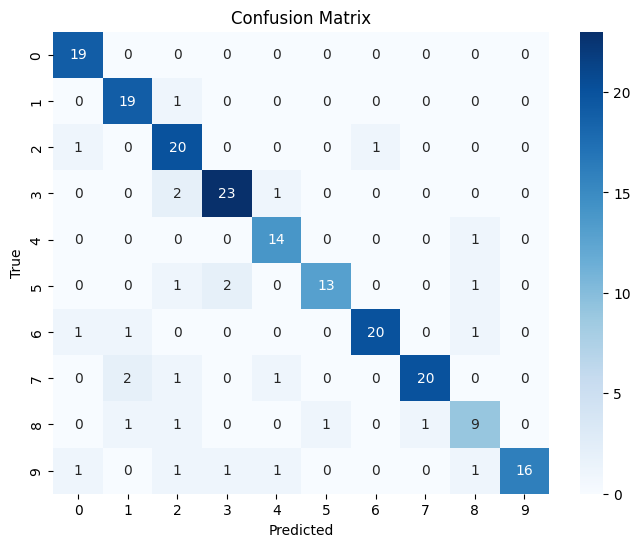

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]
# Select 1000 samples
X_sample = X[:1000]
y_sample = y[:1000]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Create a LogisticRegression model
model = LogisticRegression(max_iter=1000) # Increase max_iter if convergence warnings occur

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")



In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Generate random data with 1000 samples, 20 features, and 2 classes
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression implementation with gradient descent
def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    n_features = X.shape[1]
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(num_iterations):
        z = np.dot(X, weights) + bias
        predictions = sigmoid(z)
        error = y - predictions
        gradient_weights = -np.dot(X.T, error) / len(X)
        gradient_bias = -np.sum(error) / len(X)
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

    return weights, bias

# Train the model
weights, bias = logistic_regression(X_train, y_train)

# Predict on the test set
z_pred = np.dot(X_test, weights) + bias
y_pred = (sigmoid(z_pred) >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.85
